# Lightgbm

This notebook will use Lightgbm algorithm to accurately predict the expected flight fare for the details of trip provided by users.

The steps are:
1. Setting up new Git Repository
2. Load data
3. Data preparation and exploration
4. Train Classifiers
5. Prediction
6. Push changes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import gc

matplotlib.use('Qt5Agg') 
%matplotlib inline

## 1. Setting up Git Repository

**[1.1]** Go to the folder I created previously `adv_mla`

In [2]:
cd /Users/frodo/Downloads/36120/Project/adv_mla/ass3/

/Users/frodo/Downloads/36120/Project/adv_mla/ass3


**[1.2]** Copy the cookiecutter data science template

In [ ]:
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

**[1.3]** Go inside the created folder `adv_mla_ass3`


In [ ]:
cd adv_mla_ass3

**[1.4]** Initialise the repo

In [ ]:
git init

**[1.5]** In your local repo, link it with Github (replace the url with your username)

In [ ]:
git remote add origin git@github.com:frodorocky/ass3.git

**[1.6]** Create a new git branch called `first_experiment`

In [ ]:
git checkout -b first_experiment

## 2. Load  data

### **[2.1]** unzip_and_merge_csvs

In [3]:
import os
from src.data.unzip_merge_csv import unzip_and_merge_csvs

current_dir = os.getcwd()
base_folder_path = os.path.join(current_dir, "data/raw/itineraries_csv")
df = unzip_and_merge_csvs(base_folder_path)

Checking subdirectory: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv
Checking subdirectory: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_cq.zip
Extracted: OAK_itineraries_cq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_cq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_an.zip
Extracted: OAK_itineraries_an.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_an.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_bu.zip
Extracted: OAK_itineraries_bu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itiner

Extracted: OAK_itineraries_zp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_zp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_xo.zip
Extracted: OAK_itineraries_xo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_xo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_zg.zip
Extracted: OAK_itineraries_zg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_zg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_xx.zip
Extracted: OAK_itineraries_xx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_xx.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_cw.zip
Extracted: OAK_itineraries_cw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_cw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ng.zip
Extracted: OAK_itineraries_ng.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ng.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_lx.zip
Extracted: OAK_itineraries_lx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_lx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_oc.zip
Extracted: OAK_itineraries_oc.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ob.zip
Extracted: OAK_itineraries_ob.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ob.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ly.zip
Extracted: OAK_itineraries_ly.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ly.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_nf.zip
Extracted: OAK_itineraries_nf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_nf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_cv.zip
Extracted: OAK_itineraries_cv.csv
Readi

Extracted: OAK_itineraries_vc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_vc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ux.zip
Extracted: OAK_itineraries_ux.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ux.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_wg.zip
Extracted: OAK_itineraries_wg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_wg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_zw.zip
Extracted: OAK_itineraries_zw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_zw.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pd.zip
Extracted: OAK_itineraries_pd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pe.zip
Extracted: OAK_itineraries_pe.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pe.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_qa.zip
Extracted: OAK_itineraries_qa.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_qa.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_rz.zip
Extracted: OAK_itineraries_rz.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ro.zip
Extracted: OAK_itineraries_ro.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ro.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pg.zip
Extracted: OAK_itineraries_pg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_rx.zip
Extracted: OAK_itineraries_rx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_rx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_qc.zip
Extracted: OAK_itineraries_qc.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_qf.zip
Extracted: OAK_itineraries_qf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_qf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pu.zip
Extracted: OAK_itineraries_pu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_sn.zip
Extracted: OAK_itineraries_sn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_sn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_qq.zip
Extracted: OAK_itineraries_qq.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_hp.zip
Extracted: OAK_itineraries_hp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_hp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_kk.zip
Extracted: OAK_itineraries_kk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_kk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_qe.zip
Extracted: OAK_itineraries_qe.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_qe.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_sz.zip
Extracted: OAK_itineraries_sz.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ix.zip
Extracted: OAK_itineraries_ix.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ix.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_jc.zip
Extracted: OAK_itineraries_jc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_jc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_sv.zip
Extracted: OAK_itineraries_sv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_sv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_pm.zip
Extracted: OAK_itineraries_pm.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ks.zip
Extracted: OAK_itineraries_ks.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ks.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_hh.zip
Extracted: OAK_itineraries_hh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_hh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_kd.zip
Extracted: OAK_itineraries_kd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_kd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_rq.zip
Extracted: OAK_itineraries_rq.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_dn.zip
Extracted: OAK_itineraries_dn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_dn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_gu.zip
Extracted: OAK_itineraries_gu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_gu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_je.zip
Extracted: OAK_itineraries_je.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_je.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_hz.zip
Extracted: OAK_itineraries_hz.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_fg.zip
Extracted: OAK_itineraries_fg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_fg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ga.zip
Extracted: OAK_itineraries_ga.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ga.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_dz.zip
Extracted: OAK_itineraries_dz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_dz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_fe.zip
Extracted: OAK_itineraries_fe.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_dl.zip
Extracted: OAK_itineraries_dl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_dl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_fd.zip
Extracted: OAK_itineraries_fd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_fd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_bk.zip
Extracted: OAK_itineraries_bk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_bk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ap.zip
Extracted: OAK_itineraries_ap.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_la.zip
Extracted: OAK_itineraries_la.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_la.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_oz.zip
Extracted: OAK_itineraries_oz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_oz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_me.zip
Extracted: OAK_itineraries_me.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_me.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_om.zip
Extracted: OAK_itineraries_om.csv
Readi

Extracted: OAK_itineraries_vz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_vz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ua.zip
Extracted: OAK_itineraries_ua.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ua.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_td.zip
Extracted: OAK_itineraries_td.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_td.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_vl.zip
Extracted: OAK_itineraries_vl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_vl.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_nn.zip
Extracted: OAK_itineraries_nn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_nn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_xc.zip
Extracted: OAK_itineraries_xc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_xc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_yg.zip
Extracted: OAK_itineraries_yg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_yg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_xt.zip
Extracted: OAK_itineraries_xt.csv
Readi

Extracted: OAK_itineraries_by.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_by.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_bn.zip
Extracted: OAK_itineraries_bn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_bn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_au.zip
Extracted: OAK_itineraries_au.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_au.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_cj.zip
Extracted: OAK_itineraries_cj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_cj.csv
Processi

Extracted: OAK_itineraries_oh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_oh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ls.zip
Extracted: OAK_itineraries_ls.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_ls.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_nl.zip
Extracted: OAK_itineraries_nl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_nl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_mw.zip
Extracted: OAK_itineraries_mw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/OAK/OAK_itineraries_mw.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_lo.zip
Extracted: DEN_itineraries_lo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_lo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_np.zip
Extracted: DEN_itineraries_np.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_np.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_mk.zip
Extracted: DEN_itineraries_mk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_mk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_mj.zip
Extracted: DEN_itineraries_mj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wf.zip
Extracted: DEN_itineraries_wf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vu.zip
Extracted: DEN_itineraries_vu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_un.zip
Extracted: DEN_itineraries_un.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_un.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wq.zip
Extracted: DEN_itineraries_wq.csv
Readi

Extracted: DEN_itineraries_wg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vc.zip
Extracted: DEN_itineraries_vc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ux.zip
Extracted: DEN_itineraries_ux.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ux.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_xh.zip
Extracted: DEN_itineraries_xh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_xh.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_os.zip
Extracted: DEN_itineraries_os.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_os.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ml.zip
Extracted: DEN_itineraries_ml.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ml.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_nw.zip
Extracted: DEN_itineraries_nw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_nw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_cg.zip
Extracted: DEN_itineraries_cg.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_cr.zip
Extracted: DEN_itineraries_cr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_cr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_am.zip
Extracted: DEN_itineraries_am.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_am.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_bv.zip
Extracted: DEN_itineraries_bv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_bv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ce.zip
Extracted: DEN_itineraries_ce.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_zf.zip
Extracted: DEN_itineraries_zf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_zf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_xy.zip
Extracted: DEN_itineraries_xy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_xy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_zq.zip
Extracted: DEN_itineraries_zq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_zq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_yj.zip
Extracted: DEN_itineraries_yj.csv
Readi

Extracted: DEN_itineraries_jz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_dq.zip
Extracted: DEN_itineraries_dq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_dq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_gj.zip
Extracted: DEN_itineraries_gj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_gj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_eu.zip
Extracted: DEN_itineraries_eu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_eu.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jo.zip
Extracted: DEN_itineraries_jo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jn.zip
Extracted: DEN_itineraries_jn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_iu.zip
Extracted: DEN_itineraries_iu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_iu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_kj.zip
Extracted: DEN_itineraries_kj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_kn.zip
Extracted: DEN_itineraries_kn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_kn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_iq.zip
Extracted: DEN_itineraries_iq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_iq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jj.zip
Extracted: DEN_itineraries_jj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ky.zip
Extracted: DEN_itineraries_ky.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_pg.zip
Extracted: DEN_itineraries_pg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_pg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_fj.zip
Extracted: DEN_itineraries_fj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_fj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_eq.zip
Extracted: DEN_itineraries_eq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_eq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_gn.zip
Extracted: DEN_itineraries_gn.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_qu.zip
Extracted: DEN_itineraries_qu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_qu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_sg.zip
Extracted: DEN_itineraries_sg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_sg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_qx.zip
Extracted: DEN_itineraries_qx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_qx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_rc.zip
Extracted: DEN_itineraries_rc.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_gc.zip
Extracted: DEN_itineraries_gc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_gc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_qn.zip
Extracted: DEN_itineraries_qn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_qn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ru.zip
Extracted: DEN_itineraries_ru.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ru.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_pj.zip
Extracted: DEN_itineraries_pj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_hx.zip
Extracted: DEN_itineraries_hx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_hx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jg.zip
Extracted: DEN_itineraries_jg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_gw.zip
Extracted: DEN_itineraries_gw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_gw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_dl.zip
Extracted: DEN_itineraries_dl.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_kg.zip
Extracted: DEN_itineraries_kg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_kg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_kf.zip
Extracted: DEN_itineraries_kf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_kf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jb.zip
Extracted: DEN_itineraries_jb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_iy.zip
Extracted: DEN_itineraries_iy.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ks.zip
Extracted: DEN_itineraries_ks.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ks.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_hh.zip
Extracted: DEN_itineraries_hh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_hh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jw.zip
Extracted: DEN_itineraries_jw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_jw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_il.zip
Extracted: DEN_itineraries_il.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ud.zip
Extracted: DEN_itineraries_ud.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ud.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_us.zip
Extracted: DEN_itineraries_us.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_us.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vh.zip
Extracted: DEN_itineraries_vh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_tw.zip
Extracted: DEN_itineraries_tw.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wz.zip
Extracted: DEN_itineraries_wz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ue.zip
Extracted: DEN_itineraries_ue.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ue.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_xu.zip
Extracted: DEN_itineraries_xu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_xu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_yq.zip
Extracted: DEN_itineraries_yq.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_nl.zip
Extracted: DEN_itineraries_nl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_nl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_mw.zip
Extracted: DEN_itineraries_mw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_mw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_oh.zip
Extracted: DEN_itineraries_oh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_oh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ls.zip
Extracted: DEN_itineraries_ls.csv
Readi

Extracted: DEN_itineraries_wj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_uu.zip
Extracted: DEN_itineraries_uu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_uu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vn.zip
Extracted: DEN_itineraries_vn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_tf.zip
Extracted: DEN_itineraries_tf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_tf.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vo.zip
Extracted: DEN_itineraries_vo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_vo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ut.zip
Extracted: DEN_itineraries_ut.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_ut.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wk.zip
Extracted: DEN_itineraries_wk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_wk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DEN/DEN_itineraries_tp.zip
Extracted: DEN_itineraries_tp.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_qb.zip
Extracted: LGA_itineraries_qb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_qb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ry.zip
Extracted: LGA_itineraries_ry.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ry.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_pf.zip
Extracted: LGA_itineraries_pf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_pf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_jh.zip
Extracted: LGA_itineraries_jh.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_dw.zip
Extracted: LGA_itineraries_dw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_dw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_gl.zip
Extracted: LGA_itineraries_gl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_gl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_es.zip
Extracted: LGA_itineraries_es.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_es.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_fh.zip
Extracted: LGA_itineraries_fh.csv
Readi

Extracted: LGA_itineraries_hg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_hg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_qr.zip
Extracted: LGA_itineraries_qr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_qr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ri.zip
Extracted: LGA_itineraries_ri.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ri.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_pv.zip
Extracted: LGA_itineraries_pv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_pv.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_vr.zip
Extracted: LGA_itineraries_vr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_vr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_wa.zip
Extracted: LGA_itineraries_wa.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_wa.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_tz.zip
Extracted: LGA_itineraries_tz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_tz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ve.zip
Extracted: LGA_itineraries_ve.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ty.zip
Extracted: LGA_itineraries_ty.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ty.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_zr.zip
Extracted: LGA_itineraries_zr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_zr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_yi.zip
Extracted: LGA_itineraries_yi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_yi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_xm.zip
Extracted: LGA_itineraries_xm.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_oa.zip
Extracted: LGA_itineraries_oa.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_oa.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_lz.zip
Extracted: LGA_itineraries_lz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_lz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_mi.zip
Extracted: LGA_itineraries_mi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_mi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_nr.zip
Extracted: LGA_itineraries_nr.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_yo.zip
Extracted: LGA_itineraries_yo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_yo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ob.zip
Extracted: LGA_itineraries_ob.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ob.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ly.zip
Extracted: LGA_itineraries_ly.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ly.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_nf.zip
Extracted: LGA_itineraries_nf.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_lu.zip
Extracted: LGA_itineraries_lu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_lu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_mf.zip
Extracted: LGA_itineraries_mf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_mf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_lb.zip
Extracted: LGA_itineraries_lb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_lb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_oy.zip
Extracted: LGA_itineraries_oy.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_cy.zip
Extracted: LGA_itineraries_cy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_cy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_af.zip
Extracted: LGA_itineraries_af.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_af.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ag.zip
Extracted: LGA_itineraries_ag.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ag.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_cx.zip
Extracted: LGA_itineraries_cx.csv
Readi

Extracted: LGA_itineraries_ab.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ab.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_by.zip
Extracted: LGA_itineraries_by.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_by.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_mv.zip
Extracted: LGA_itineraries_mv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_mv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_nm.zip
Extracted: LGA_itineraries_nm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_nm.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_nn.zip
Extracted: LGA_itineraries_nn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_nn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_lf.zip
Extracted: LGA_itineraries_lf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_lf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ny.zip
Extracted: LGA_itineraries_ny.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ny.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_mb.zip
Extracted: LGA_itineraries_mb.csv
Readi

Extracted: LGA_itineraries_qj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_qj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_su.zip
Extracted: LGA_itineraries_su.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_su.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_pn.zip
Extracted: LGA_itineraries_pn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_pn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_qh.zip
Extracted: LGA_itineraries_qh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_qh.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_jp.zip
Extracted: LGA_itineraries_jp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_jp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ho.zip
Extracted: LGA_itineraries_ho.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ho.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_kt.zip
Extracted: LGA_itineraries_kt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_kt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_fd.zip
Extracted: LGA_itineraries_fd.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_gb.zip
Extracted: LGA_itineraries_gb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_gb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_dy.zip
Extracted: LGA_itineraries_dy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_dy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_jr.zip
Extracted: LGA_itineraries_jr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_jr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LGA/LGA_itineraries_ii.zip
Extracted: LGA_itineraries_ii.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_km.zip
Extracted: LAX_itineraries_km.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_km.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hv.zip
Extracted: LAX_itineraries_hv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ji.zip
Extracted: LAX_itineraries_ji.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ji.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ir.zip
Extracted: LAX_itineraries_ir.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_jj.zip
Extracted: LAX_itineraries_jj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_jj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_iq.zip
Extracted: LAX_itineraries_iq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_iq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_kn.zip
Extracted: LAX_itineraries_kn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_kn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hu.zip
Extracted: LAX_itineraries_hu.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_it.zip
Extracted: LAX_itineraries_it.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_it.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_kk.zip
Extracted: LAX_itineraries_kk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_kk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hp.zip
Extracted: LAX_itineraries_hp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_qe.zip
Extracted: LAX_itineraries_qe.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hs.zip
Extracted: LAX_itineraries_hs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_jl.zip
Extracted: LAX_itineraries_jl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_jl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_iw.zip
Extracted: LAX_itineraries_iw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_iw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_pb.zip
Extracted: LAX_itineraries_pb.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_oq.zip
Extracted: LAX_itineraries_oq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_oq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_nb.zip
Extracted: LAX_itineraries_nb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_nb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_my.zip
Extracted: LAX_itineraries_my.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_my.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_of.zip
Extracted: LAX_itineraries_of.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_an.zip
Extracted: LAX_itineraries_an.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_an.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_cf.zip
Extracted: LAX_itineraries_cf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_cf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ay.zip
Extracted: LAX_itineraries_ay.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ay.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_bb.zip
Extracted: LAX_itineraries_bb.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_oa.zip
Extracted: LAX_itineraries_oa.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_oa.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_aj.zip
Extracted: LAX_itineraries_aj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_aj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_bq.zip
Extracted: LAX_itineraries_bq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_bq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_cu.zip
Extracted: LAX_itineraries_cu.csv
Readi

Extracted: LAX_itineraries_nq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_nq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_mj.zip
Extracted: LAX_itineraries_mj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_mj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ly.zip
Extracted: LAX_itineraries_ly.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ly.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ob.zip
Extracted: LAX_itineraries_ob.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ob.csv
Processi

Extracted: LAX_itineraries_yc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_yc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_zx.zip
Extracted: LAX_itineraries_zx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_zx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_xg.zip
Extracted: LAX_itineraries_xg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_xg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_zo.zip
Extracted: LAX_itineraries_zo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_zo.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_vz.zip
Extracted: LAX_itineraries_vz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_vz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_tg.zip
Extracted: LAX_itineraries_tg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_tg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_vx.zip
Extracted: LAX_itineraries_vx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_vx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_uc.zip
Extracted: LAX_itineraries_uc.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_uu.zip
Extracted: LAX_itineraries_uu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_uu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_wj.zip
Extracted: LAX_itineraries_wj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_wj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_tq.zip
Extracted: LAX_itineraries_tq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_tq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ub.zip
Extracted: LAX_itineraries_ub.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_xw.zip
Extracted: LAX_itineraries_xw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_xw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ug.zip
Extracted: LAX_itineraries_ug.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ug.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_tc.zip
Extracted: LAX_itineraries_tc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_tc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_wx.zip
Extracted: LAX_itineraries_wx.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_nn.zip
Extracted: LAX_itineraries_nn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_nn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_mu.zip
Extracted: LAX_itineraries_mu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_mu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_xc.zip
Extracted: LAX_itineraries_xc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_xc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_yg.zip
Extracted: LAX_itineraries_yg.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hh.zip
Extracted: LAX_itineraries_hh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_hh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ks.zip
Extracted: LAX_itineraries_ks.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ks.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_kd.zip
Extracted: LAX_itineraries_kd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_kd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_qj.zip
Extracted: LAX_itineraries_qj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_pm.zip
Extracted: LAX_itineraries_pm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_pm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_sv.zip
Extracted: LAX_itineraries_sv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_sv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_qi.zip
Extracted: LAX_itineraries_qi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_qi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_rr.zip
Extracted: LAX_itineraries_rr.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_sd.zip
Extracted: LAX_itineraries_sd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_sd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ph.zip
Extracted: LAX_itineraries_ph.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ph.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ss.zip
Extracted: LAX_itineraries_ss.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ss.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_ql.zip
Extracted: LAX_itineraries_ql.csv
Readi

Extracted: LAX_itineraries_qo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_qo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_rt.zip
Extracted: LAX_itineraries_rt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_rt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_pk.zip
Extracted: LAX_itineraries_pk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_pk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_sp.zip
Extracted: LAX_itineraries_sp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/LAX/LAX_itineraries_sp.csv
Checking

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tw.zip
Extracted: ATL_itineraries_tw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ud.zip
Extracted: ATL_itineraries_ud.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ud.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_av.zip
Extracted: ATL_itineraries_av.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_av.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_bm.zip
Extracted: ATL_itineraries_bm.csv
Readi

Extracted: ATL_itineraries_ur.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ur.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vi.zip
Extracted: ATL_itineraries_vi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_xb.zip
Extracted: ATL_itineraries_xb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_xb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_yf.zip
Extracted: ATL_itineraries_yf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_yf.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tf.zip
Extracted: ATL_itineraries_tf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ub.zip
Extracted: ATL_itineraries_ub.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ub.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vy.zip
Extracted: ATL_itineraries_vy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_wj.zip
Extracted: ATL_itineraries_wj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vo.zip
Extracted: ATL_itineraries_vo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tp.zip
Extracted: ATL_itineraries_tp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_wk.zip
Extracted: ATL_itineraries_wk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_wk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vx.zip
Extracted: ATL_itineraries_vx.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_kc.zip
Extracted: ATL_itineraries_kc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_kc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_jg.zip
Extracted: ATL_itineraries_jg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_jg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_kt.zip
Extracted: ATL_itineraries_kt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_kt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ho.zip
Extracted: ATL_itineraries_ho.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_gb.zip
Extracted: ATL_itineraries_gb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_gb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ff.zip
Extracted: ATL_itineraries_ff.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ff.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_hm.zip
Extracted: ATL_itineraries_hm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_hm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_kv.zip
Extracted: ATL_itineraries_kv.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_fb.zip
Extracted: ATL_itineraries_fb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_fb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ey.zip
Extracted: ATL_itineraries_ey.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ey.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_gf.zip
Extracted: ATL_itineraries_gf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_gf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_rp.zip
Extracted: ATL_itineraries_rp.csv
Readi

Extracted: ATL_itineraries_hj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_hj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ju.zip
Extracted: ATL_itineraries_ju.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ju.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_in.zip
Extracted: ATL_itineraries_in.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_in.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_kf.zip
Extracted: ATL_itineraries_kf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_kf.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_hp.zip
Extracted: ATL_itineraries_hp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_hp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_jo.zip
Extracted: ATL_itineraries_jo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_jo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_it.zip
Extracted: ATL_itineraries_it.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_it.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_hg.zip
Extracted: ATL_itineraries_hg.csv
Readi

Extracted: ATL_itineraries_qf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_qf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_pb.zip
Extracted: ATL_itineraries_pb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_pb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_sy.zip
Extracted: ATL_itineraries_sy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_sy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_et.zip
Extracted: ATL_itineraries_et.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_et.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_pc.zip
Extracted: ATL_itineraries_pc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_pc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_qg.zip
Extracted: ATL_itineraries_qg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_qg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_pt.zip
Extracted: ATL_itineraries_pt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_pt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_so.zip
Extracted: ATL_itineraries_so.csv
Readi

Extracted: ATL_itineraries_id.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_id.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_go.zip
Extracted: ATL_itineraries_go.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_go.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_dt.zip
Extracted: ATL_itineraries_dt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_dt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_fk.zip
Extracted: ATL_itineraries_fk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_fk.csv
Processi

Extracted: ATL_itineraries_za.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_za.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_un.zip
Extracted: ATL_itineraries_un.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_un.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vu.zip
Extracted: ATL_itineraries_vu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tj.zip
Extracted: ATL_itineraries_tj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tj.csv
Processi

Extracted: ATL_itineraries_mk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_mk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_np.zip
Extracted: ATL_itineraries_np.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_np.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_oc.zip
Extracted: ATL_itineraries_oc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_oc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_lx.zip
Extracted: ATL_itineraries_lx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_lx.csv
Processi

Extracted: ATL_itineraries_zp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_zp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_yk.zip
Extracted: ATL_itineraries_yk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_yk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vd.zip
Extracted: ATL_itineraries_vd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tl.zip
Extracted: ATL_itineraries_tl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_tl.csv
Processi

Extracted: ATL_itineraries_cd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_cd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vr.zip
Extracted: ATL_itineraries_vr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_vr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ui.zip
Extracted: ATL_itineraries_ui.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ui.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_wv.zip
Extracted: ATL_itineraries_wv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_wv.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_zr.zip
Extracted: ATL_itineraries_zr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_zr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_xz.zip
Extracted: ATL_itineraries_xz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_xz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ze.zip
Extracted: ATL_itineraries_ze.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ATL/ATL_itineraries_ze.csv
Checking subdirectory: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT
Processing .zip file: /Users/frodo/Downloads/36120/Project/ad

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_zz.zip
Extracted: CLT_itineraries_zz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_zz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ya.zip
Extracted: CLT_itineraries_ya.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ya.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_xr.zip
Extracted: CLT_itineraries_xr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_xr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_yv.zip
Extracted: CLT_itineraries_yv.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_cj.zip
Extracted: CLT_itineraries_cj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_cj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_au.zip
Extracted: CLT_itineraries_au.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_au.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_bn.zip
Extracted: CLT_itineraries_bn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_bn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_by.zip
Extracted: CLT_itineraries_by.csv
Readi

Extracted: CLT_itineraries_lg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_lg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_nx.zip
Extracted: CLT_itineraries_nx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_nx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_mc.zip
Extracted: CLT_itineraries_mc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_mc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_lp.zip
Extracted: CLT_itineraries_lp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_lp.csv
Processi

Extracted: CLT_itineraries_gf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_gf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_rp.zip
Extracted: CLT_itineraries_rp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_rp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_qk.zip
Extracted: CLT_itineraries_qk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_qk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_st.zip
Extracted: CLT_itineraries_st.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_st.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_hn.zip
Extracted: CLT_itineraries_hn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_hn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ku.zip
Extracted: CLT_itineraries_ku.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ku.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_jf.zip
Extracted: CLT_itineraries_jf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_jf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_kb.zip
Extracted: CLT_itineraries_kb.csv
Readi

Extracted: CLT_itineraries_rc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_rc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_qx.zip
Extracted: CLT_itineraries_qx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_qx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_gu.zip
Extracted: CLT_itineraries_gu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_gu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_dn.zip
Extracted: CLT_itineraries_dn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_dn.csv
Processi

Extracted: CLT_itineraries_sf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_sf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ru.zip
Extracted: CLT_itineraries_ru.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ru.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_qn.zip
Extracted: CLT_itineraries_qn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_qn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_sq.zip
Extracted: CLT_itineraries_sq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_sq.csv
Processi

Extracted: CLT_itineraries_dt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_dt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_fk.zip
Extracted: CLT_itineraries_fk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_fk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ep.zip
Extracted: CLT_itineraries_ep.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ep.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_dc.zip
Extracted: CLT_itineraries_dc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_dc.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_jj.zip
Extracted: CLT_itineraries_jj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_jj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_iq.zip
Extracted: CLT_itineraries_iq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_iq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ip.zip
Extracted: CLT_itineraries_ip.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ip.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_jk.zip
Extracted: CLT_itineraries_jk.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_dd.zip
Extracted: CLT_itineraries_dd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_dd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_kk.zip
Extracted: CLT_itineraries_kk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_kk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_hp.zip
Extracted: CLT_itineraries_hp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_hp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_jo.zip
Extracted: CLT_itineraries_jo.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_qf.zip
Extracted: CLT_itineraries_qf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_qf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_pb.zip
Extracted: CLT_itineraries_pb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_pb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_sy.zip
Extracted: CLT_itineraries_sy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_sy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_et.zip
Extracted: CLT_itineraries_et.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_lj.zip
Extracted: CLT_itineraries_lj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_lj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_oq.zip
Extracted: CLT_itineraries_oq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_oq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_mn.zip
Extracted: CLT_itineraries_mn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_mn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_nu.zip
Extracted: CLT_itineraries_nu.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_vg.zip
Extracted: CLT_itineraries_vg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_vg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_wc.zip
Extracted: CLT_itineraries_wc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_wc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_tx.zip
Extracted: CLT_itineraries_tx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_tx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_uk.zip
Extracted: CLT_itineraries_uk.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ax.zip
Extracted: CLT_itineraries_ax.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ax.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_wu.zip
Extracted: CLT_itineraries_wu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_wu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_tn.zip
Extracted: CLT_itineraries_tn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_tn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_vq.zip
Extracted: CLT_itineraries_vq.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_yn.zip
Extracted: CLT_itineraries_yn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_yn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_yy.zip
Extracted: CLT_itineraries_yy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_yy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_zb.zip
Extracted: CLT_itineraries_zb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_zb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/CLT/CLT_itineraries_ti.zip
Extracted: CLT_itineraries_ti.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_dn.zip
Extracted: PHL_itineraries_dn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_dn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_gu.zip
Extracted: PHL_itineraries_gu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_gu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ej.zip
Extracted: PHL_itineraries_ej.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ej.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_fq.zip
Extracted: PHL_itineraries_fq.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_sd.zip
Extracted: PHL_itineraries_sd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_sd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_jq.zip
Extracted: PHL_itineraries_jq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_jq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ij.zip
Extracted: PHL_itineraries_ij.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ij.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ku.zip
Extracted: PHL_itineraries_ku.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_sr.zip
Extracted: PHL_itineraries_sr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_sr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_qm.zip
Extracted: PHL_itineraries_qm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_qm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_rv.zip
Extracted: PHL_itineraries_rv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_rv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_re.zip
Extracted: PHL_itineraries_re.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ju.zip
Extracted: PHL_itineraries_ju.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ju.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_kf.zip
Extracted: PHL_itineraries_kf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_kf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_jb.zip
Extracted: PHL_itineraries_jb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_jb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_iy.zip
Extracted: PHL_itineraries_iy.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_gq.zip
Extracted: PHL_itineraries_gq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_gq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_dj.zip
Extracted: PHL_itineraries_dj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_dj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ey.zip
Extracted: PHL_itineraries_ey.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ey.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_fb.zip
Extracted: PHL_itineraries_fb.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_oj.zip
Extracted: PHL_itineraries_oj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_oj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ny.zip
Extracted: PHL_itineraries_ny.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ny.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_mb.zip
Extracted: PHL_itineraries_mb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_mb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_lf.zip
Extracted: PHL_itineraries_lf.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_tt.zip
Extracted: PHL_itineraries_tt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_tt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_wo.zip
Extracted: PHL_itineraries_wo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_wo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_up.zip
Extracted: PHL_itineraries_up.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_up.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vk.zip
Extracted: PHL_itineraries_vk.csv
Readi

Extracted: PHL_itineraries_mw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_mw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_oh.zip
Extracted: PHL_itineraries_oh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_oh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ls.zip
Extracted: PHL_itineraries_ls.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ls.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ye.zip
Extracted: PHL_itineraries_ye.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ye.csv
Processi

Extracted: PHL_itineraries_ol.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ol.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ms.zip
Extracted: PHL_itineraries_ms.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ms.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nh.zip
Extracted: PHL_itineraries_nh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_cx.zip
Extracted: PHL_itineraries_cx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_cx.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_tg.zip
Extracted: PHL_itineraries_tg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_tg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vz.zip
Extracted: PHL_itineraries_vz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ua.zip
Extracted: PHL_itineraries_ua.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ua.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_te.zip
Extracted: PHL_itineraries_te.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_on.zip
Extracted: PHL_itineraries_on.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_on.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_lu.zip
Extracted: PHL_itineraries_lu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_lu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nj.zip
Extracted: PHL_itineraries_nj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_mq.zip
Extracted: PHL_itineraries_mq.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ot.zip
Extracted: PHL_itineraries_ot.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ot.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_lo.zip
Extracted: PHL_itineraries_lo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_lo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_np.zip
Extracted: PHL_itineraries_np.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_np.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_mk.zip
Extracted: PHL_itineraries_mk.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vw.zip
Extracted: PHL_itineraries_vw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_th.zip
Extracted: PHL_itineraries_th.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_th.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ws.zip
Extracted: PHL_itineraries_ws.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ws.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vu.zip
Extracted: PHL_itineraries_vu.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_oe.zip
Extracted: PHL_itineraries_oe.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_oe.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nv.zip
Extracted: PHL_itineraries_nv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_mm.zip
Extracted: PHL_itineraries_mm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_mm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_or.zip
Extracted: PHL_itineraries_or.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_wb.zip
Extracted: PHL_itineraries_wb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_wb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ty.zip
Extracted: PHL_itineraries_ty.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ty.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vf.zip
Extracted: PHL_itineraries_vf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_vd.zip
Extracted: PHL_itineraries_vd.csv
Readi

Extracted: PHL_itineraries_nt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_lk.zip
Extracted: PHL_itineraries_lk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_lk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_op.zip
Extracted: PHL_itineraries_op.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_op.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nc.zip
Extracted: PHL_itineraries_nc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_nc.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_so.zip
Extracted: PHL_itineraries_so.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_so.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_pt.zip
Extracted: PHL_itineraries_pt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_pt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_rk.zip
Extracted: PHL_itineraries_rk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_rk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_qp.zip
Extracted: PHL_itineraries_qp.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_jy.zip
Extracted: PHL_itineraries_jy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_jy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_hf.zip
Extracted: PHL_itineraries_hf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_hf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_jn.zip
Extracted: PHL_itineraries_jn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_jn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_iu.zip
Extracted: PHL_itineraries_iu.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_es.zip
Extracted: PHL_itineraries_es.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_es.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_fh.zip
Extracted: PHL_itineraries_fh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_fh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_dw.zip
Extracted: PHL_itineraries_dw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_dw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_gl.zip
Extracted: PHL_itineraries_gl.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_km.zip
Extracted: PHL_itineraries_km.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_km.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ef.zip
Extracted: PHL_itineraries_ef.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_ef.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_db.zip
Extracted: PHL_itineraries_db.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_db.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/PHL/PHL_itineraries_gy.zip
Extracted: PHL_itineraries_gy.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_mn.zip
Extracted: DTW_itineraries_mn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_mn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_nu.zip
Extracted: DTW_itineraries_nu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_nu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_lj.zip
Extracted: DTW_itineraries_lj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_lj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_oq.zip
Extracted: DTW_itineraries_oq.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_cs.zip
Extracted: DTW_itineraries_cs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_cs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_al.zip
Extracted: DTW_itineraries_al.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_al.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_bw.zip
Extracted: DTW_itineraries_bw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_bw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_cd.zip
Extracted: DTW_itineraries_cd.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_yh.zip
Extracted: DTW_itineraries_yh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_yh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_yi.zip
Extracted: DTW_itineraries_yi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_yi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_zr.zip
Extracted: DTW_itineraries_zr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_zr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_xm.zip
Extracted: DTW_itineraries_xm.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_bg.zip
Extracted: DTW_itineraries_bg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_bg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tj.zip
Extracted: DTW_itineraries_tj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_wq.zip
Extracted: DTW_itineraries_wq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_wq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_un.zip
Extracted: DTW_itineraries_un.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_nr.zip
Extracted: DTW_itineraries_nr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_nr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_mi.zip
Extracted: DTW_itineraries_mi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_mi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ov.zip
Extracted: DTW_itineraries_ov.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ov.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_lm.zip
Extracted: DTW_itineraries_lm.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_zt.zip
Extracted: DTW_itineraries_zt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_zt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_wd.zip
Extracted: DTW_itineraries_wd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_wd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ws.zip
Extracted: DTW_itineraries_ws.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ws.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_th.zip
Extracted: DTW_itineraries_th.csv
Readi

Extracted: DTW_itineraries_fj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_fj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_pg.zip
Extracted: DTW_itineraries_pg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_pg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_qc.zip
Extracted: DTW_itineraries_qc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_qc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_rx.zip
Extracted: DTW_itineraries_rx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_rx.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_iq.zip
Extracted: DTW_itineraries_iq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_iq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_kn.zip
Extracted: DTW_itineraries_kn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_kn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_hu.zip
Extracted: DTW_itineraries_hu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_hu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ee.zip
Extracted: DTW_itineraries_ee.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_de.zip
Extracted: DTW_itineraries_de.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_de.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ea.zip
Extracted: DTW_itineraries_ea.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ea.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_fz.zip
Extracted: DTW_itineraries_fz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_fz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_gi.zip
Extracted: DTW_itineraries_gi.csv
Readi

Extracted: DTW_itineraries_pb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_pb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_sy.zip
Extracted: DTW_itineraries_sy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_sy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_qf.zip
Extracted: DTW_itineraries_qf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_qf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_qg.zip
Extracted: DTW_itineraries_qg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_qg.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_eo.zip
Extracted: DTW_itineraries_eo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_eo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_gp.zip
Extracted: DTW_itineraries_gp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_gp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_dk.zip
Extracted: DTW_itineraries_dk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_dk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_rf.zip
Extracted: DTW_itineraries_rf.csv
Readi

Extracted: DTW_itineraries_kg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_kg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_jc.zip
Extracted: DTW_itineraries_jc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_jc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ix.zip
Extracted: DTW_itineraries_ix.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ix.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_hk.zip
Extracted: DTW_itineraries_hk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_hk.csv
Processi

Extracted: DTW_itineraries_ju.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ju.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_in.zip
Extracted: DTW_itineraries_in.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_in.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_kq.zip
Extracted: DTW_itineraries_kq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_kq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_hj.zip
Extracted: DTW_itineraries_hj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_hj.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_fd.zip
Extracted: DTW_itineraries_fd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_fd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_eh.zip
Extracted: DTW_itineraries_eh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_eh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_fs.zip
Extracted: DTW_itineraries_fs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_fs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_dl.zip
Extracted: DTW_itineraries_dl.csv
Readi

Extracted: DTW_itineraries_sg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_sg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_sf.zip
Extracted: DTW_itineraries_sf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_sf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_qy.zip
Extracted: DTW_itineraries_qy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_qy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_rb.zip
Extracted: DTW_itineraries_rb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_rb.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_wi.zip
Extracted: DTW_itineraries_wi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_wi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tr.zip
Extracted: DTW_itineraries_tr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_vm.zip
Extracted: DTW_itineraries_vm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_vm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_uv.zip
Extracted: DTW_itineraries_uv.csv
Readi

Extracted: DTW_itineraries_oy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_oy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_lb.zip
Extracted: DTW_itineraries_lb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_lb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_md.zip
Extracted: DTW_itineraries_md.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_md.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_nh.zip
Extracted: DTW_itineraries_nh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_nh.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tg.zip
Extracted: DTW_itineraries_tg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_vx.zip
Extracted: DTW_itineraries_vx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_vx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_uc.zip
Extracted: DTW_itineraries_uc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_uc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_cn.zip
Extracted: DTW_itineraries_cn.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tt.zip
Extracted: DTW_itineraries_tt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ug.zip
Extracted: DTW_itineraries_ug.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ug.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tc.zip
Extracted: DTW_itineraries_tc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_tc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_wx.zip
Extracted: DTW_itineraries_wx.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_lf.zip
Extracted: DTW_itineraries_lf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_lf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_mb.zip
Extracted: DTW_itineraries_mb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_mb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ny.zip
Extracted: DTW_itineraries_ny.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ny.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ci.zip
Extracted: DTW_itineraries_ci.csv
Readi

Extracted: DTW_itineraries_aw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_aw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ch.zip
Extracted: DTW_itineraries_ch.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_ch.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_nx.zip
Extracted: DTW_itineraries_nx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_nx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_mc.zip
Extracted: DTW_itineraries_mc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DTW/DTW_itineraries_mc.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_cv.zip
Extracted: IAD_itineraries_cv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_cv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_be.zip
Extracted: IAD_itineraries_be.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_be.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ca.zip
Extracted: IAD_itineraries_ca.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ca.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_nq.zip
Extracted: IAD_itineraries_nq.csv
Readi

Extracted: IAD_itineraries_ll.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ll.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ow.zip
Extracted: IAD_itineraries_ow.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ow.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_bg.zip
Extracted: IAD_itineraries_bg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_bg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_cc.zip
Extracted: IAD_itineraries_cc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_cc.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_yh.zip
Extracted: IAD_itineraries_yh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_yh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_xl.zip
Extracted: IAD_itineraries_xl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_xl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_zd.zip
Extracted: IAD_itineraries_zd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_zd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_mm.zip
Extracted: IAD_itineraries_mm.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_uj.zip
Extracted: IAD_itineraries_uj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_uj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_tl.zip
Extracted: IAD_itineraries_tl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_tl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ww.zip
Extracted: IAD_itineraries_ww.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ww.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_uh.zip
Extracted: IAD_itineraries_uh.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_yj.zip
Extracted: IAD_itineraries_yj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_yj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_zq.zip
Extracted: IAD_itineraries_zq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_zq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_xn.zip
Extracted: IAD_itineraries_xn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_xn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ve.zip
Extracted: IAD_itineraries_ve.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_fy.zip
Extracted: IAD_itineraries_fy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_fy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_hr.zip
Extracted: IAD_itineraries_hr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_hr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ki.zip
Extracted: IAD_itineraries_ki.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ki.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_iv.zip
Extracted: IAD_itineraries_iv.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ds.zip
Extracted: IAD_itineraries_ds.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ds.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_gh.zip
Extracted: IAD_itineraries_gh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_gh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ew.zip
Extracted: IAD_itineraries_ew.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ew.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_fl.zip
Extracted: IAD_itineraries_fl.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_hb.zip
Extracted: IAD_itineraries_hb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_hb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ky.zip
Extracted: IAD_itineraries_ky.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ky.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_if.zip
Extracted: IAD_itineraries_if.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_if.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_dv.zip
Extracted: IAD_itineraries_dv.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ir.zip
Extracted: IAD_itineraries_ir.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ir.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_km.zip
Extracted: IAD_itineraries_km.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_km.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_hv.zip
Extracted: IAD_itineraries_hv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_hv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ie.zip
Extracted: IAD_itineraries_ie.csv
Readi

Extracted: IAD_itineraries_sp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_sp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_qo.zip
Extracted: IAD_itineraries_qo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_qo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rt.zip
Extracted: IAD_itineraries_rt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ka.zip
Extracted: IAD_itineraries_ka.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ka.csv
Processi

Extracted: IAD_itineraries_rw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ph.zip
Extracted: IAD_itineraries_ph.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ph.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ss.zip
Extracted: IAD_itineraries_ss.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ss.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_jf.zip
Extracted: IAD_itineraries_jf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_jf.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_qz.zip
Extracted: IAD_itineraries_qz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_qz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ra.zip
Extracted: IAD_itineraries_ra.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ra.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_qi.zip
Extracted: IAD_itineraries_qi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_qi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rr.zip
Extracted: IAD_itineraries_rr.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_pl.zip
Extracted: IAD_itineraries_pl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_pl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rs.zip
Extracted: IAD_itineraries_rs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_qh.zip
Extracted: IAD_itineraries_qh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_qh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_pn.zip
Extracted: IAD_itineraries_pn.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rg.zip
Extracted: IAD_itineraries_rg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_px.zip
Extracted: IAD_itineraries_px.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_px.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_sc.zip
Extracted: IAD_itineraries_sc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_sc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_rp.zip
Extracted: IAD_itineraries_rp.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_lg.zip
Extracted: IAD_itineraries_lg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_lg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_nx.zip
Extracted: IAD_itineraries_nx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_nx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_mc.zip
Extracted: IAD_itineraries_mc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_mc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_xu.zip
Extracted: IAD_itineraries_xu.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_at.zip
Extracted: IAD_itineraries_at.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_at.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ck.zip
Extracted: IAD_itineraries_ck.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ck.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ac.zip
Extracted: IAD_itineraries_ac.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ac.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_bx.zip
Extracted: IAD_itineraries_bx.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_co.zip
Extracted: IAD_itineraries_co.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_co.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ap.zip
Extracted: IAD_itineraries_ap.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_ap.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_bk.zip
Extracted: IAD_itineraries_bk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_bk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_cx.zip
Extracted: IAD_itineraries_cx.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_xq.zip
Extracted: IAD_itineraries_xq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_xq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_zy.zip
Extracted: IAD_itineraries_zy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_zy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_yb.zip
Extracted: IAD_itineraries_yb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_yb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_xf.zip
Extracted: IAD_itineraries_xf.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_uw.zip
Extracted: IAD_itineraries_uw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_uw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_vl.zip
Extracted: IAD_itineraries_vl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/IAD/IAD_itineraries_vl.csv
Checking subdirectory: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_cb.zip
Extracted: JFK_itineraries_cb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_cb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/ad

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_yz.zip
Extracted: JFK_itineraries_yz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_yz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ns.zip
Extracted: JFK_itineraries_ns.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ns.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_mh.zip
Extracted: JFK_itineraries_mh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_mh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ow.zip
Extracted: JFK_itineraries_ow.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_vv.zip
Extracted: JFK_itineraries_vv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_vv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_um.zip
Extracted: JFK_itineraries_um.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_um.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_we.zip
Extracted: JFK_itineraries_we.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_we.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_uz.zip
Extracted: JFK_itineraries_uz.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ui.zip
Extracted: JFK_itineraries_ui.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ui.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_vr.zip
Extracted: JFK_itineraries_vr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_vr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_tm.zip
Extracted: JFK_itineraries_tm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_tm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_wv.zip
Extracted: JFK_itineraries_wv.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_lh.zip
Extracted: JFK_itineraries_lh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_lh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_os.zip
Extracted: JFK_itineraries_os.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_os.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ml.zip
Extracted: JFK_itineraries_ml.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ml.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_nw.zip
Extracted: JFK_itineraries_nw.csv
Readi

Extracted: JFK_itineraries_bb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_bb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ay.zip
Extracted: JFK_itineraries_ay.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ay.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_cf.zip
Extracted: JFK_itineraries_cf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_cf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_an.zip
Extracted: JFK_itineraries_an.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_an.csv
Processi

Extracted: JFK_itineraries_jo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_jo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_hg.zip
Extracted: JFK_itineraries_hg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_hg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_jx.zip
Extracted: JFK_itineraries_jx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_jx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ic.zip
Extracted: JFK_itineraries_ic.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ic.csv
Processi

Extracted: JFK_itineraries_pb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_iw.zip
Extracted: JFK_itineraries_iw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_iw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_jl.zip
Extracted: JFK_itineraries_jl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_jl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_hs.zip
Extracted: JFK_itineraries_hs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_hs.csv
Processi

Extracted: JFK_itineraries_ro.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ro.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pp.zip
Extracted: JFK_itineraries_pp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_sk.zip
Extracted: JFK_itineraries_sk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_sk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ie.zip
Extracted: JFK_itineraries_ie.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ie.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pe.zip
Extracted: JFK_itineraries_pe.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pe.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pd.zip
Extracted: JFK_itineraries_pd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ps.zip
Extracted: JFK_itineraries_ps.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ps.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_sh.zip
Extracted: JFK_itineraries_sh.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_sr.zip
Extracted: JFK_itineraries_sr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_sr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_qm.zip
Extracted: JFK_itineraries_qm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_qm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_rv.zip
Extracted: JFK_itineraries_rv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_rv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_rw.zip
Extracted: JFK_itineraries_rw.csv
Readi

Extracted: JFK_itineraries_sf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_sf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_qn.zip
Extracted: JFK_itineraries_qn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_qn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ru.zip
Extracted: JFK_itineraries_ru.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ru.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pj.zip
Extracted: JFK_itineraries_pj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_pj.csv
Processi

Extracted: JFK_itineraries_ja.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ja.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_iz.zip
Extracted: JFK_itineraries_iz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_iz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ke.zip
Extracted: JFK_itineraries_ke.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ke.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_qk.zip
Extracted: JFK_itineraries_qk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_qk.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_hj.zip
Extracted: JFK_itineraries_hj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_hj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_kq.zip
Extracted: JFK_itineraries_kq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_kq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_in.zip
Extracted: JFK_itineraries_in.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_in.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ju.zip
Extracted: JFK_itineraries_ju.csv
Readi

Extracted: JFK_itineraries_bo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_bo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ck.zip
Extracted: JFK_itineraries_ck.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ck.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ld.zip
Extracted: JFK_itineraries_ld.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ld.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_nl.zip
Extracted: JFK_itineraries_nl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_nl.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ma.zip
Extracted: JFK_itineraries_ma.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ma.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_cj.zip
Extracted: JFK_itineraries_cj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_cj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_bn.zip
Extracted: JFK_itineraries_bn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_bn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_au.zip
Extracted: JFK_itineraries_au.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_xt.zip
Extracted: JFK_itineraries_xt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_xt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_yg.zip
Extracted: JFK_itineraries_yg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_yg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_xc.zip
Extracted: JFK_itineraries_xc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_xc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_mu.zip
Extracted: JFK_itineraries_mu.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_uw.zip
Extracted: JFK_itineraries_uw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_uw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_td.zip
Extracted: JFK_itineraries_td.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_td.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_vz.zip
Extracted: JFK_itineraries_vz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_vz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_ua.zip
Extracted: JFK_itineraries_ua.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_oz.zip
Extracted: JFK_itineraries_oz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_oz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_yw.zip
Extracted: JFK_itineraries_yw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_yw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_zl.zip
Extracted: JFK_itineraries_zl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_zl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/JFK/JFK_itineraries_xs.zip
Extracted: JFK_itineraries_xs.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_an.zip
Extracted: DFW_itineraries_an.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_an.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_bu.zip
Extracted: DFW_itineraries_bu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_bu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_cf.zip
Extracted: DFW_itineraries_cf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_cf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_bb.zip
Extracted: DFW_itineraries_bb.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ze.zip
Extracted: DFW_itineraries_ze.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ze.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_xz.zip
Extracted: DFW_itineraries_xz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_xz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_zr.zip
Extracted: DFW_itineraries_zr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_zr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_yi.zip
Extracted: DFW_itineraries_yi.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_mo.zip
Extracted: DFW_itineraries_mo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_mo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_nt.zip
Extracted: DFW_itineraries_nt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_nt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_cd.zip
Extracted: DFW_itineraries_cd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_cd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_cs.zip
Extracted: DFW_itineraries_cs.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ow.zip
Extracted: DFW_itineraries_ow.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ow.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ll.zip
Extracted: DFW_itineraries_ll.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ll.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ns.zip
Extracted: DFW_itineraries_ns.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ns.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_mh.zip
Extracted: DFW_itineraries_mh.csv
Readi

Extracted: DFW_itineraries_sh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_sh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_pd.zip
Extracted: DFW_itineraries_pd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_pd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_pe.zip
Extracted: DFW_itineraries_pe.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_pe.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_qa.zip
Extracted: DFW_itineraries_qa.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_qa.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_jh.zip
Extracted: DFW_itineraries_jh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_jh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_is.zip
Extracted: DFW_itineraries_is.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_is.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_kl.zip
Extracted: DFW_itineraries_kl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_kl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_hw.zip
Extracted: DFW_itineraries_hw.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ew.zip
Extracted: DFW_itineraries_ew.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ew.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_gh.zip
Extracted: DFW_itineraries_gh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_gh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ds.zip
Extracted: DFW_itineraries_ds.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ds.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_jx.zip
Extracted: DFW_itineraries_jx.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_pl.zip
Extracted: DFW_itineraries_pl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_pl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_sw.zip
Extracted: DFW_itineraries_sw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_sw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_jb.zip
Extracted: DFW_itineraries_jb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_jb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_iy.zip
Extracted: DFW_itineraries_iy.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_su.zip
Extracted: DFW_itineraries_su.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_su.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_pn.zip
Extracted: DFW_itineraries_pn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_pn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_rf.zip
Extracted: DFW_itineraries_rf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_rf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_py.zip
Extracted: DFW_itineraries_py.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_sf.zip
Extracted: DFW_itineraries_sf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_sf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_rb.zip
Extracted: DFW_itineraries_rb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_rb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_qy.zip
Extracted: DFW_itineraries_qy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_qy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_hl.zip
Extracted: DFW_itineraries_hl.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ag.zip
Extracted: DFW_itineraries_ag.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ag.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_cx.zip
Extracted: DFW_itineraries_cx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_cx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ms.zip
Extracted: DFW_itineraries_ms.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ms.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_nh.zip
Extracted: DFW_itineraries_nh.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_xf.zip
Extracted: DFW_itineraries_xf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_xf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_yb.zip
Extracted: DFW_itineraries_yb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_yb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_zy.zip
Extracted: DFW_itineraries_zy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_zy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_tr.zip
Extracted: DFW_itineraries_tr.csv
Readi

Extracted: DFW_itineraries_vh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_vh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_vi.zip
Extracted: DFW_itineraries_vi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_vi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ur.zip
Extracted: DFW_itineraries_ur.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ur.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_wm.zip
Extracted: DFW_itineraries_wm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_wm.csv
Processi

Extracted: DFW_itineraries_zi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_zi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_xa.zip
Extracted: DFW_itineraries_xa.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_xa.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ye.zip
Extracted: DFW_itineraries_ye.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_ye.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_oh.zip
Extracted: DFW_itineraries_oh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/DFW/DFW_itineraries_oh.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_nw.zip
Extracted: BOS_itineraries_nw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_nw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ml.zip
Extracted: BOS_itineraries_ml.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ml.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cg.zip
Extracted: BOS_itineraries_cg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bc.zip
Extracted: BOS_itineraries_bc.csv
Readi

Extracted: BOS_itineraries_al.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_al.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bw.zip
Extracted: BOS_itineraries_bw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cs.zip
Extracted: BOS_itineraries_cs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bd.zip
Extracted: BOS_itineraries_bd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bd.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ca.zip
Extracted: BOS_itineraries_ca.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ca.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bg.zip
Extracted: BOS_itineraries_bg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cc.zip
Extracted: BOS_itineraries_cc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bp.zip
Extracted: BOS_itineraries_bp.csv
Readi

Extracted: BOS_itineraries_nr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_nr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_mi.zip
Extracted: BOS_itineraries_mi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_mi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_lz.zip
Extracted: BOS_itineraries_lz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_lz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_oa.zip
Extracted: BOS_itineraries_oa.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_oa.csv
Processi

Extracted: BOS_itineraries_eq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_eq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_fj.zip
Extracted: BOS_itineraries_fj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_fj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_du.zip
Extracted: BOS_itineraries_du.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_du.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_gn.zip
Extracted: BOS_itineraries_gn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_gn.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_sn.zip
Extracted: BOS_itineraries_sn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_sn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_pu.zip
Extracted: BOS_itineraries_pu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_pu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_pt.zip
Extracted: BOS_itineraries_pt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_pt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_so.zip
Extracted: BOS_itineraries_so.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_gi.zip
Extracted: BOS_itineraries_gi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_gi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_dr.zip
Extracted: BOS_itineraries_dr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_dr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ea.zip
Extracted: BOS_itineraries_ea.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ea.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_fz.zip
Extracted: BOS_itineraries_fz.csv
Readi

Extracted: BOS_itineraries_ks.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ks.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_il.zip
Extracted: BOS_itineraries_il.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_il.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_jw.zip
Extracted: BOS_itineraries_jw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_jw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_kd.zip
Extracted: BOS_itineraries_kd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_kd.csv
Processi

Extracted: BOS_itineraries_rt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_rt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ru.zip
Extracted: BOS_itineraries_ru.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_ru.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_qn.zip
Extracted: BOS_itineraries_qn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_qn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_sq.zip
Extracted: BOS_itineraries_sq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_sq.csv
Processi

Extracted: BOS_itineraries_hx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_hx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_kc.zip
Extracted: BOS_itineraries_kc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_kc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_jg.zip
Extracted: BOS_itineraries_jg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_jg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_dl.zip
Extracted: BOS_itineraries_dl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_dl.csv
Processi

Extracted: BOS_itineraries_cn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_as.zip
Extracted: BOS_itineraries_as.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_as.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bh.zip
Extracted: BOS_itineraries_bh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cl.zip
Extracted: BOS_itineraries_cl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cl.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_mf.zip
Extracted: BOS_itineraries_mf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_mf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_lu.zip
Extracted: BOS_itineraries_lu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_lu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_on.zip
Extracted: BOS_itineraries_on.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_on.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_mq.zip
Extracted: BOS_itineraries_mq.csv
Readi

Extracted: BOS_itineraries_cj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_cj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_au.zip
Extracted: BOS_itineraries_au.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_au.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bn.zip
Extracted: BOS_itineraries_bn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_bn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_le.zip
Extracted: BOS_itineraries_le.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/BOS/BOS_itineraries_le.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_xo.zip
Extracted: EWR_itineraries_xo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_xo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_zp.zip
Extracted: EWR_itineraries_zp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_zp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yk.zip
Extracted: EWR_itineraries_yk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_xx.zip
Extracted: EWR_itineraries_xx.csv
Readi

Extracted: EWR_itineraries_cq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_cq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ay.zip
Extracted: EWR_itineraries_ay.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ay.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_bb.zip
Extracted: EWR_itineraries_bb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_bb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_cf.zip
Extracted: EWR_itineraries_cf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_cf.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ml.zip
Extracted: EWR_itineraries_ml.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ml.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_cg.zip
Extracted: EWR_itineraries_cg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_cg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_bc.zip
Extracted: EWR_itineraries_bc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_bc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ax.zip
Extracted: EWR_itineraries_ax.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yl.zip
Extracted: EWR_itineraries_yl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_zw.zip
Extracted: EWR_itineraries_zw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_zw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ov.zip
Extracted: EWR_itineraries_ov.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ov.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_lm.zip
Extracted: EWR_itineraries_lm.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_va.zip
Extracted: EWR_itineraries_va.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_va.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_uz.zip
Extracted: EWR_itineraries_uz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_uz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ti.zip
Extracted: EWR_itineraries_ti.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ti.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_wr.zip
Extracted: EWR_itineraries_wr.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_gy.zip
Extracted: EWR_itineraries_gy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_gy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_db.zip
Extracted: EWR_itineraries_db.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_db.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ji.zip
Extracted: EWR_itineraries_ji.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ji.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ir.zip
Extracted: EWR_itineraries_ir.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_fk.zip
Extracted: EWR_itineraries_fk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_fk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ep.zip
Extracted: EWR_itineraries_ep.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ep.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_dv.zip
Extracted: EWR_itineraries_dv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_dv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_gm.zip
Extracted: EWR_itineraries_gm.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_hc.zip
Extracted: EWR_itineraries_hc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_hc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ip.zip
Extracted: EWR_itineraries_ip.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ip.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_jk.zip
Extracted: EWR_itineraries_jk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_jk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ht.zip
Extracted: EWR_itineraries_ht.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_sl.zip
Extracted: EWR_itineraries_sl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_sl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_qd.zip
Extracted: EWR_itineraries_qd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_qd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_iu.zip
Extracted: EWR_itineraries_iu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_iu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_jn.zip
Extracted: EWR_itineraries_jn.csv
Readi

Extracted: EWR_itineraries_qq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_qq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_sn.zip
Extracted: EWR_itineraries_sn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_sn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_pu.zip
Extracted: EWR_itineraries_pu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_pu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_pt.zip
Extracted: EWR_itineraries_pt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_pt.csv
Processi

Extracted: EWR_itineraries_il.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_il.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_jw.zip
Extracted: EWR_itineraries_jw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_jw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_kd.zip
Extracted: EWR_itineraries_kd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_kd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_pn.zip
Extracted: EWR_itineraries_pn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_pn.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_el.zip
Extracted: EWR_itineraries_el.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_el.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_gs.zip
Extracted: EWR_itineraries_gs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_gs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_dh.zip
Extracted: EWR_itineraries_dh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_dh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_gd.zip
Extracted: EWR_itineraries_gd.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ez.zip
Extracted: EWR_itineraries_ez.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ez.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_di.zip
Extracted: EWR_itineraries_di.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_di.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_gr.zip
Extracted: EWR_itineraries_gr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_gr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_em.zip
Extracted: EWR_itineraries_em.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_jp.zip
Extracted: EWR_itineraries_jp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_jp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ik.zip
Extracted: EWR_itineraries_ik.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ik.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_hx.zip
Extracted: EWR_itineraries_hx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_hx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_kc.zip
Extracted: EWR_itineraries_kc.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ru.zip
Extracted: EWR_itineraries_ru.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ru.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_qn.zip
Extracted: EWR_itineraries_qn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_qn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_sq.zip
Extracted: EWR_itineraries_sq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_sq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_pj.zip
Extracted: EWR_itineraries_pj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yb.zip
Extracted: EWR_itineraries_yb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_xf.zip
Extracted: EWR_itineraries_xf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_xf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_vm.zip
Extracted: EWR_itineraries_vm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_vm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_uv.zip
Extracted: EWR_itineraries_uv.csv
Readi

Extracted: EWR_itineraries_ar.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ar.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_co.zip
Extracted: EWR_itineraries_co.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_co.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ap.zip
Extracted: EWR_itineraries_ap.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_ap.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_bk.zip
Extracted: EWR_itineraries_bk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_bk.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_zl.zip
Extracted: EWR_itineraries_zl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_zl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yw.zip
Extracted: EWR_itineraries_yw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_xs.zip
Extracted: EWR_itineraries_xs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_xs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_me.zip
Extracted: EWR_itineraries_me.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_vk.zip
Extracted: EWR_itineraries_vk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_vk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_up.zip
Extracted: EWR_itineraries_up.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_up.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_uq.zip
Extracted: EWR_itineraries_uq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_uq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_vj.zip
Extracted: EWR_itineraries_vj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_mu.zip
Extracted: EWR_itineraries_mu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_mu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_oj.zip
Extracted: EWR_itineraries_oj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_oj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_lq.zip
Extracted: EWR_itineraries_lq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_lq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_yg.zip
Extracted: EWR_itineraries_yg.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_bl.zip
Extracted: EWR_itineraries_bl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_bl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_aw.zip
Extracted: EWR_itineraries_aw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/EWR/EWR_itineraries_aw.csv
Checking subdirectory: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_bu.zip
Extracted: SFO_itineraries_bu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_bu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/ad

Extracted: SFO_itineraries_bc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_bc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ax.zip
Extracted: SFO_itineraries_ax.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ax.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_cp.zip
Extracted: SFO_itineraries_cp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_cp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ao.zip
Extracted: SFO_itineraries_ao.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ao.csv
Processi

Extracted: SFO_itineraries_lk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_lk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_cd.zip
Extracted: SFO_itineraries_cd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_cd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_al.zip
Extracted: SFO_itineraries_al.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_al.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_bw.zip
Extracted: SFO_itineraries_bw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_bw.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_cc.zip
Extracted: SFO_itineraries_cc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_cc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_bp.zip
Extracted: SFO_itineraries_bp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_bp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ak.zip
Extracted: SFO_itineraries_ak.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ak.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ct.zip
Extracted: SFO_itineraries_ct.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_fi.zip
Extracted: SFO_itineraries_fi.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_fi.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_gz.zip
Extracted: SFO_itineraries_gz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_gz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_da.zip
Extracted: SFO_itineraries_da.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_da.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ee.zip
Extracted: SFO_itineraries_ee.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ji.zip
Extracted: SFO_itineraries_ji.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ji.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ir.zip
Extracted: SFO_itineraries_ir.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ir.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_km.zip
Extracted: SFO_itineraries_km.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_km.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_hv.zip
Extracted: SFO_itineraries_hv.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_rj.zip
Extracted: SFO_itineraries_rj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_rj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_qq.zip
Extracted: SFO_itineraries_qq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_qq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_sn.zip
Extracted: SFO_itineraries_sn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_sn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_pu.zip
Extracted: SFO_itineraries_pu.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_sl.zip
Extracted: SFO_itineraries_sl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_sl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_qd.zip
Extracted: SFO_itineraries_qd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_qd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_iu.zip
Extracted: SFO_itineraries_iu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_iu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_jn.zip
Extracted: SFO_itineraries_jn.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_hj.zip
Extracted: SFO_itineraries_hj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_hj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ju.zip
Extracted: SFO_itineraries_ju.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ju.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_in.zip
Extracted: SFO_itineraries_in.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_in.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ge.zip
Extracted: SFO_itineraries_ge.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_dj.zip
Extracted: SFO_itineraries_dj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_dj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_gq.zip
Extracted: SFO_itineraries_gq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_gq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_dy.zip
Extracted: SFO_itineraries_dy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_dy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_gb.zip
Extracted: SFO_itineraries_gb.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_dm.zip
Extracted: SFO_itineraries_dm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_dm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_jf.zip
Extracted: SFO_itineraries_jf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_jf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_kb.zip
Extracted: SFO_itineraries_kb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_kb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_hy.zip
Extracted: SFO_itineraries_hy.csv
Readi

Extracted: SFO_itineraries_zz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_zz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ya.zip
Extracted: SFO_itineraries_ya.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ya.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_wj.zip
Extracted: SFO_itineraries_wj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_wj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_tq.zip
Extracted: SFO_itineraries_tq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_tq.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ox.zip
Extracted: SFO_itineraries_ox.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_ox.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_yu.zip
Extracted: SFO_itineraries_yu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_yu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_zn.zip
Extracted: SFO_itineraries_zn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_zn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_xq.zip
Extracted: SFO_itineraries_xq.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_lf.zip
Extracted: SFO_itineraries_lf.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_lf.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_nn.zip
Extracted: SFO_itineraries_nn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_nn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_mu.zip
Extracted: SFO_itineraries_mu.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_mu.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_oj.zip
Extracted: SFO_itineraries_oj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_lr.zip
Extracted: SFO_itineraries_lr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_lr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_nm.zip
Extracted: SFO_itineraries_nm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_nm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_mv.zip
Extracted: SFO_itineraries_mv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_mv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/SFO/SFO_itineraries_yd.zip
Extracted: SFO_itineraries_yd.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_zl.zip
Extracted: ORD_itineraries_zl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_zl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_yw.zip
Extracted: ORD_itineraries_yw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_yw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_tg.zip
Extracted: ORD_itineraries_tg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_tg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_vx.zip
Extracted: ORD_itineraries_vx.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_vl.zip
Extracted: ORD_itineraries_vl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_vl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ts.zip
Extracted: ORD_itineraries_ts.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ts.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_wh.zip
Extracted: ORD_itineraries_wh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_wh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_wi.zip
Extracted: ORD_itineraries_wi.csv
Readi

Extracted: ORD_itineraries_us.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_us.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_xc.zip
Extracted: ORD_itineraries_xc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_xc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_yg.zip
Extracted: ORD_itineraries_yg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_yg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_xt.zip
Extracted: ORD_itineraries_xt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_xt.csv
Processi

Extracted: ORD_itineraries_ab.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ab.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_au.zip
Extracted: ORD_itineraries_au.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_au.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_bn.zip
Extracted: ORD_itineraries_bn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_bn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_cj.zip
Extracted: ORD_itineraries_cj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_cj.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_rg.zip
Extracted: ORD_itineraries_rg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_rg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_st.zip
Extracted: ORD_itineraries_st.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_st.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_po.zip
Extracted: ORD_itineraries_po.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_po.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_rp.zip
Extracted: ORD_itineraries_rp.csv
Readi

Extracted: ORD_itineraries_jr.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_jr.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_hm.zip
Extracted: ORD_itineraries_hm.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_hm.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_kv.zip
Extracted: ORD_itineraries_kv.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_kv.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ff.zip
Extracted: ORD_itineraries_ff.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ff.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_es.zip
Extracted: ORD_itineraries_es.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_es.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_kx.zip
Extracted: ORD_itineraries_kx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_kx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_hc.zip
Extracted: ORD_itineraries_hc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_hc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ig.zip
Extracted: ORD_itineraries_ig.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_sj.zip
Extracted: ORD_itineraries_sj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_sj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_sk.zip
Extracted: ORD_itineraries_sk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_sk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_pp.zip
Extracted: ORD_itineraries_pp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_pp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ro.zip
Extracted: ORD_itineraries_ro.csv
Readi

Extracted: ORD_itineraries_hs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_hs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_jl.zip
Extracted: ORD_itineraries_jl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_jl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_iw.zip
Extracted: ORD_itineraries_iw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_iw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_dg.zip
Extracted: ORD_itineraries_dg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_dg.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_cg.zip
Extracted: ORD_itineraries_cg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_cg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ao.zip
Extracted: ORD_itineraries_ao.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ao.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_bt.zip
Extracted: ORD_itineraries_bt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_bt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_cp.zip
Extracted: ORD_itineraries_cp.csv
Readi

Extracted: ORD_itineraries_lk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_lk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_nt.zip
Extracted: ORD_itineraries_nt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_nt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_mo.zip
Extracted: ORD_itineraries_mo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_mo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_xy.zip
Extracted: ORD_itineraries_xy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_xy.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_zt.zip
Extracted: ORD_itineraries_zt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_zt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_zc.zip
Extracted: ORD_itineraries_zc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_zc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_yx.zip
Extracted: ORD_itineraries_yx.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_yx.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_ws.zip
Extracted: ORD_itineraries_ws.csv
Readi

Extracted: ORD_itineraries_vb.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_vb.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_uy.zip
Extracted: ORD_itineraries_uy.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_uy.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_tj.zip
Extracted: ORD_itineraries_tj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_tj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_wq.zip
Extracted: ORD_itineraries_wq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/ORD/ORD_itineraries_wq.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_kh.zip
Extracted: MIA_itineraries_kh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_kh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_iw.zip
Extracted: MIA_itineraries_iw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_iw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_jl.zip
Extracted: MIA_itineraries_jl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_jl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_hd.zip
Extracted: MIA_itineraries_hd.csv
Readi

Extracted: MIA_itineraries_gl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_gl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_es.zip
Extracted: MIA_itineraries_es.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_es.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_fh.zip
Extracted: MIA_itineraries_fh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_fh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ed.zip
Extracted: MIA_itineraries_ed.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ed.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_hw.zip
Extracted: MIA_itineraries_hw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_hw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_id.zip
Extracted: MIA_itineraries_id.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_id.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_rn.zip
Extracted: MIA_itineraries_rn.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_rn.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_qu.zip
Extracted: MIA_itineraries_qu.csv
Readi

Extracted: MIA_itineraries_wd.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wd.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_th.zip
Extracted: MIA_itineraries_th.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_th.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ws.zip
Extracted: MIA_itineraries_ws.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ws.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ul.zip
Extracted: MIA_itineraries_ul.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ul.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_tk.zip
Extracted: MIA_itineraries_tk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_tk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wp.zip
Extracted: MIA_itineraries_wp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wq.zip
Extracted: MIA_itineraries_wq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_tj.zip
Extracted: MIA_itineraries_tj.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wc.zip
Extracted: MIA_itineraries_wc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_vg.zip
Extracted: MIA_itineraries_vg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_vg.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wt.zip
Extracted: MIA_itineraries_wt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_wt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_to.zip
Extracted: MIA_itineraries_to.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_uh.zip
Extracted: MIA_itineraries_uh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_uh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ww.zip
Extracted: MIA_itineraries_ww.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ww.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_tl.zip
Extracted: MIA_itineraries_tl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_tl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_zg.zip
Extracted: MIA_itineraries_zg.csv
Readi

Extracted: MIA_itineraries_zk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_zk.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_yp.zip
Extracted: MIA_itineraries_yp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_yp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_xc.zip
Extracted: MIA_itineraries_xc.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_xc.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_yg.zip
Extracted: MIA_itineraries_yg.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_yg.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_nz.zip
Extracted: MIA_itineraries_nz.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_nz.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ma.zip
Extracted: MIA_itineraries_ma.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ma.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_le.zip
Extracted: MIA_itineraries_le.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_le.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_bn.zip
Extracted: MIA_itineraries_bn.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_lw.zip
Extracted: MIA_itineraries_lw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_lw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ol.zip
Extracted: MIA_itineraries_ol.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ol.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ag.zip
Extracted: MIA_itineraries_ag.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_ag.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_cx.zip
Extracted: MIA_itineraries_cx.csv
Readi

Extracted: MIA_itineraries_lt.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_lt.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_oo.zip
Extracted: MIA_itineraries_oo.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_oo.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_mp.zip
Extracted: MIA_itineraries_mp.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_mp.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_nk.zip
Extracted: MIA_itineraries_nk.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_nk.csv
Processi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_fs.zip
Extracted: MIA_itineraries_fs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_fs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_eh.zip
Extracted: MIA_itineraries_eh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_eh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_gw.zip
Extracted: MIA_itineraries_gw.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_gw.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_dl.zip
Extracted: MIA_itineraries_dl.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_qh.zip
Extracted: MIA_itineraries_qh.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_qh.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_rs.zip
Extracted: MIA_itineraries_rs.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_rs.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_pl.zip
Extracted: MIA_itineraries_pl.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_pl.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_sw.zip
Extracted: MIA_itineraries_sw.csv
Readi

Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_rq.zip
Extracted: MIA_itineraries_rq.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_rq.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_qj.zip
Extracted: MIA_itineraries_qj.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_qj.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_su.zip
Extracted: MIA_itineraries_su.csv
Reading .csv file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_su.csv
Processing .zip file: /Users/frodo/Downloads/36120/Project/adv_mla/ass3/data/raw/itineraries_csv/MIA/MIA_itineraries_pn.zip
Extracted: MIA_itineraries_pn.csv
Readi

### **[2.2]** Load dataset Load the dataset in chunks and concatenate them into a single dataframe

In [3]:
def load_data_in_chunks(file_path, chunk_size=50000):
    chunks = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunks.append(chunk)
    return pd.concat(chunks, axis=0)

# Load data
df = load_data_in_chunks('data/raw/merged.csv')

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,e1b137527b9175d7d930c3af82e70ae0,2022-04-19,2022-05-20,OAK,ATL,PT7H52M,False,False,False,103.98,...,1653107460||1653126600,2022-05-20T22:31:00.000-06:00||2022-05-21T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||Airbus A320,9180||10620,943||1207,coach||coach
1,d813ebd107e3fa700206c0d96015da7a,2022-04-19,2022-05-20,OAK,ATL,PT6H15M,False,False,False,216.58,...,1653067080||1653084660,2022-05-20T10:18:00.000-07:00||2022-05-20T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4920||15600,None||None,coach||coach
2,e8ece5ad6f5962c696e06e031fc2a24a,2022-04-19,2022-05-20,OAK,ATL,PT9H6M,False,False,False,216.58,...,1653056820||1653084660,2022-05-20T07:27:00.000-07:00||2022-05-20T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,4920||15600,None||None,coach||coach
3,c004a54681335100f326c9613b3c9448,2022-04-19,2022-05-20,OAK,ATL,PT6H17M,False,False,False,237.58,...,1653110940||1653127980,2022-05-20T22:29:00.000-07:00||2022-05-21T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5580||13980,None||None,coach||coach
4,4a42bbf77211b4afa7b9e14005949120,2022-04-19,2022-05-20,OAK,ATL,PT14H12M,False,False,False,307.21,...,1653115560||1653159180,2022-05-20T23:46:00.000-07:00||2022-05-21T14:5...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737-900||Boeing 737-900,7500||17580,672||2178,coach||coach


In [4]:
# Display the first few rows for inspection
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,e1b137527b9175d7d930c3af82e70ae0,2022-04-19,2022-05-20,OAK,ATL,PT7H52M,False,False,False,103.98,...,1653107460||1653126600,2022-05-20T22:31:00.000-06:00||2022-05-21T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||Airbus A320,9180||10620,943||1207,coach||coach
1,d813ebd107e3fa700206c0d96015da7a,2022-04-19,2022-05-20,OAK,ATL,PT6H15M,False,False,False,216.58,...,1653067080||1653084660,2022-05-20T10:18:00.000-07:00||2022-05-20T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4920||15600,None||None,coach||coach
2,e8ece5ad6f5962c696e06e031fc2a24a,2022-04-19,2022-05-20,OAK,ATL,PT9H6M,False,False,False,216.58,...,1653056820||1653084660,2022-05-20T07:27:00.000-07:00||2022-05-20T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,4920||15600,None||None,coach||coach
3,c004a54681335100f326c9613b3c9448,2022-04-19,2022-05-20,OAK,ATL,PT6H17M,False,False,False,237.58,...,1653110940||1653127980,2022-05-20T22:29:00.000-07:00||2022-05-21T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5580||13980,None||None,coach||coach
4,4a42bbf77211b4afa7b9e14005949120,2022-04-19,2022-05-20,OAK,ATL,PT14H12M,False,False,False,307.21,...,1653115560||1653159180,2022-05-20T23:46:00.000-07:00||2022-05-21T14:5...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737-900||Boeing 737-900,7500||17580,672||2178,coach||coach


### **[2.3]** Check the information for dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

### **[2.4]**  Check again for missing values to ensure they have been addressed

In [6]:
missing_values = df.isnull().sum()
missing_values

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
travelDuration                            0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
totalFare                                 0
totalTravelDistance                  959619
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode                       0
segmentsEquipmentDescription         262676
segmentsDurationInSeconds                 0
segmentsDistance                          0
segmentsCabinCode               

## 3. Data Cleaning and Exploration

In [4]:
df.dropna(inplace=True)

### **[3.1]**  Define preprocessing function

In [5]:
from src.features.preprocessor import DataFramePreprocessor

preprocessor = DataFramePreprocessor(df.copy())

# Now apply the preprocess method
df_cleaned = preprocessor.preprocess()

# Display the first few rows of the preprocessed DataFrame
print(df_cleaned.head())

                              legId  searchDate  flightDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0  2022-04-19  2022-05-20             OAK   
4  4a42bbf77211b4afa7b9e14005949120  2022-04-19  2022-05-20             OAK   
5  9157572cdd530976f707a162a4fcfde8  2022-04-19  2022-05-20             OAK   
7  e8baed3d41a0c35856f7591a5baad060  2022-04-19  2022-05-20             OAK   
8  965e29ef7e8d11bf05f723a28ab8e4e0  2022-04-19  2022-05-20             OAK   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL        PT7H52M           False         False      False   
4                ATL       PT14H12M           False         False      False   
5                ATL         PT9H8M            True         False      False   
7                ATL       PT13H14M           False         False      False   
8                ATL       PT12H40M           False         False      False   

   totalFare  totalTravelDistance segmentsAr

### **[3.2]**  Saved the processed data

In [32]:
df_cleaned.to_csv('data/processed/merged.csv')

In [9]:
df_cleaned.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineCode', 'segmentsEquipmentDescription',
       'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode',
       'departure_hour', 'arrival_hour'],
      dtype='object')

### **[3.3]**  Data exploration

In [10]:
print(df_cleaned.describe())

          totalFare  totalTravelDistance  segmentsDurationInSeconds  \
count  1.233790e+07         1.233790e+07               1.233790e+07   
mean   3.836261e+02         1.572339e+03               1.663993e+04   
std    2.102343e+02         8.412266e+02               6.821145e+03   
min    2.397000e+01         9.700000e+01               2.760000e+03   
25%    2.301000e+02         8.620000e+02               1.140000e+04   
50%    3.566000e+02         1.392000e+03               1.596000e+04   
75%    4.986000e+02         2.375000e+03               2.190000e+04   
max    8.260610e+03         4.430000e+03               4.596000e+04   

       segmentsDistance  departure_hour  arrival_hour  
count      1.233790e+07    1.233790e+07  1.233790e+07  
mean       1.574434e+03    1.204657e+01  1.538328e+01  
std        8.416893e+02    5.168067e+00  5.665138e+00  
min        9.700000e+01    0.000000e+00  0.000000e+00  
25%        8.620000e+02    8.000000e+00  1.200000e+01  
50%        1.393000e+03 

#### **[3.3.1]**  Distribution of Total Fare

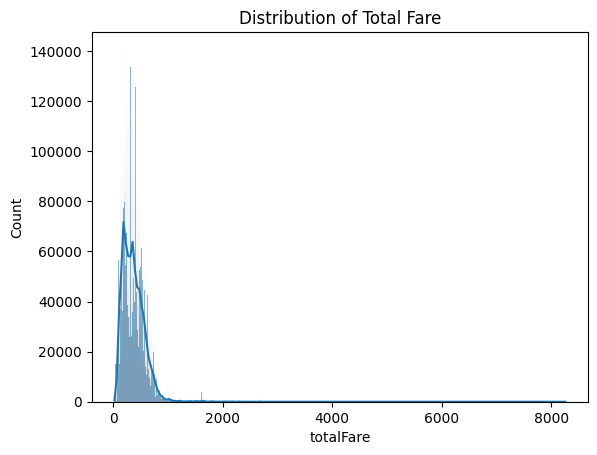

In [20]:
sns.histplot(cleaned['totalFare'], kde=True)
plt.title('Distribution of Total Fare')
plt.show()

#### **[3.3.2]** startingAirport vs totalFare

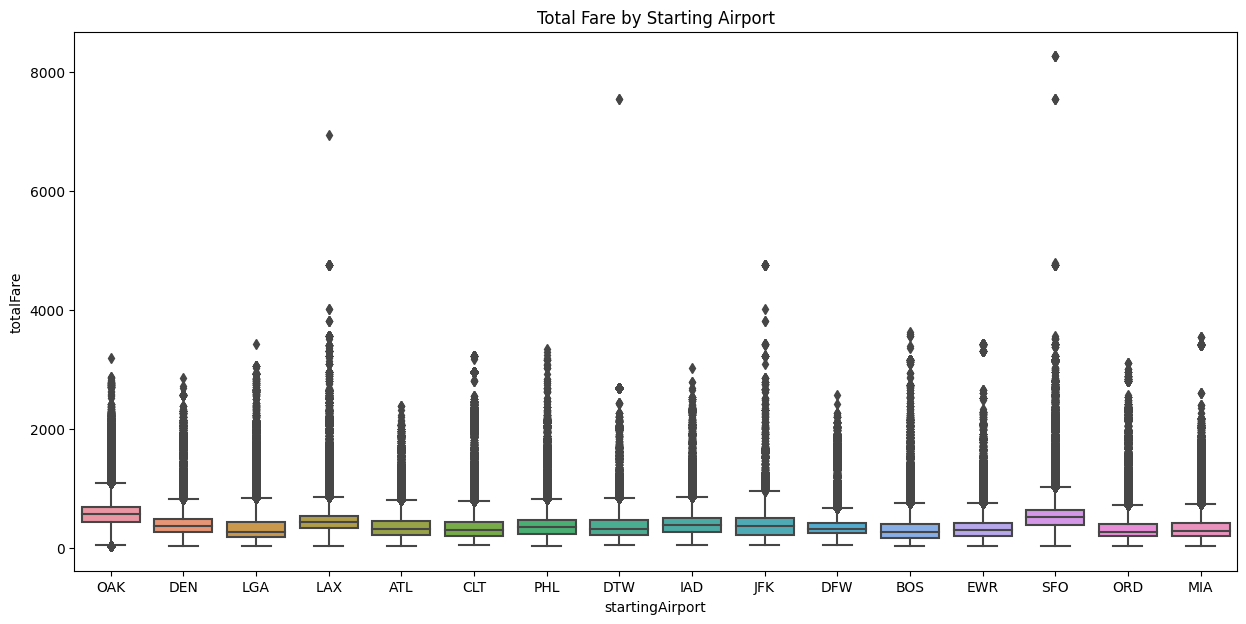

In [21]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=cleaned, x='startingAirport', y='totalFare')
plt.title('Total Fare by Starting Airport')
plt.show()

#### **[3.3.3]** departure_hour vs totalFare

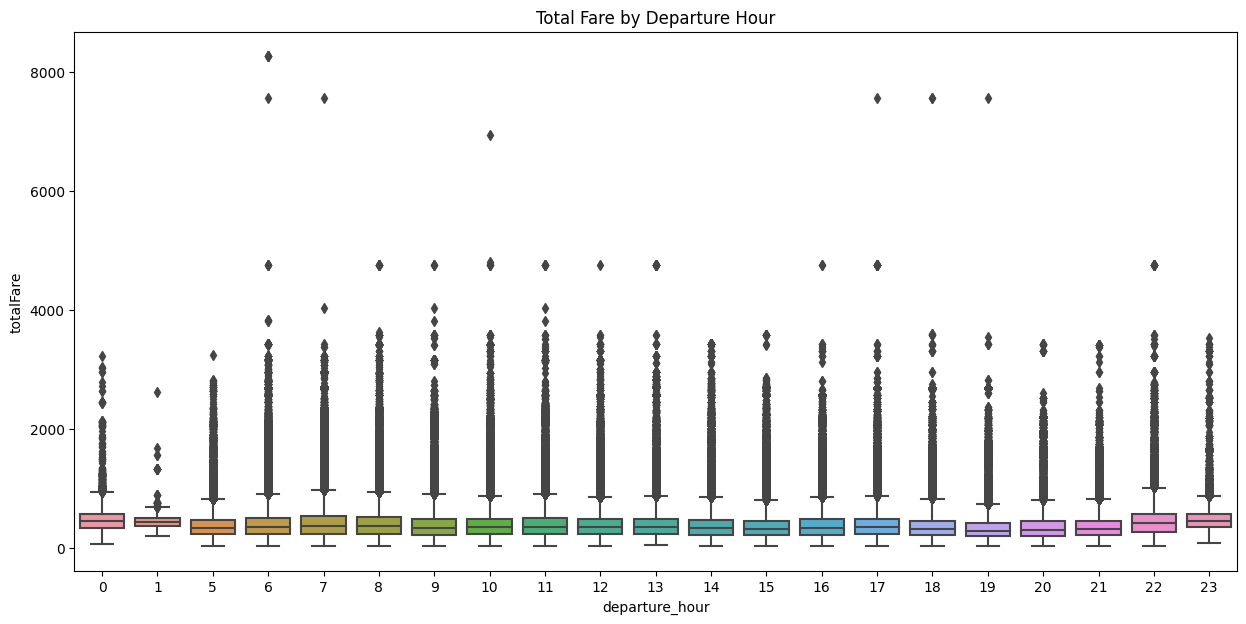

In [23]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=cleaned, x='departure_hour', y='totalFare')
plt.title('Total Fare by Departure Hour')
plt.show()

#### **[3.3.4]** isBasicEconomy, isRefundable, & isNonStop vs Average Total Fare    

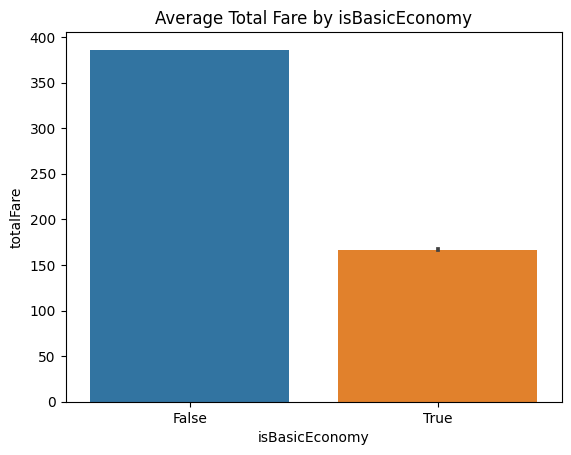

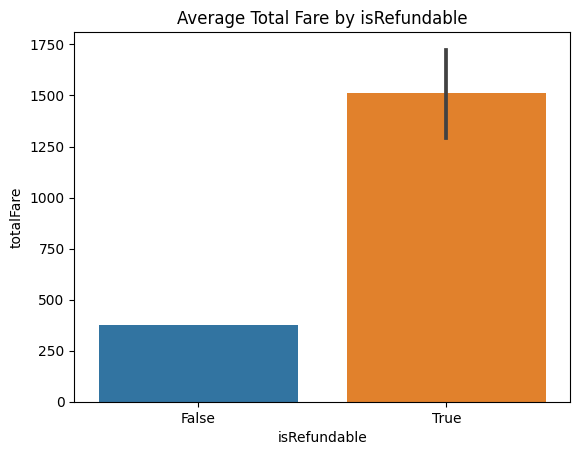

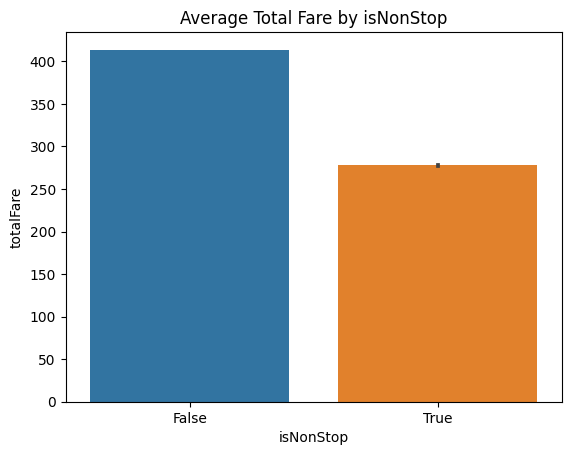

In [25]:
boolean_cols = ['isBasicEconomy', 'isRefundable', 'isNonStop']

for col in boolean_cols:
    sns.barplot(data=cleaned, x=col, y='totalFare')
    plt.title(f'Average Total Fare by {col}')
    plt.show()

#### **[3.3.5]** Total Fare vs. Total Travel Distance

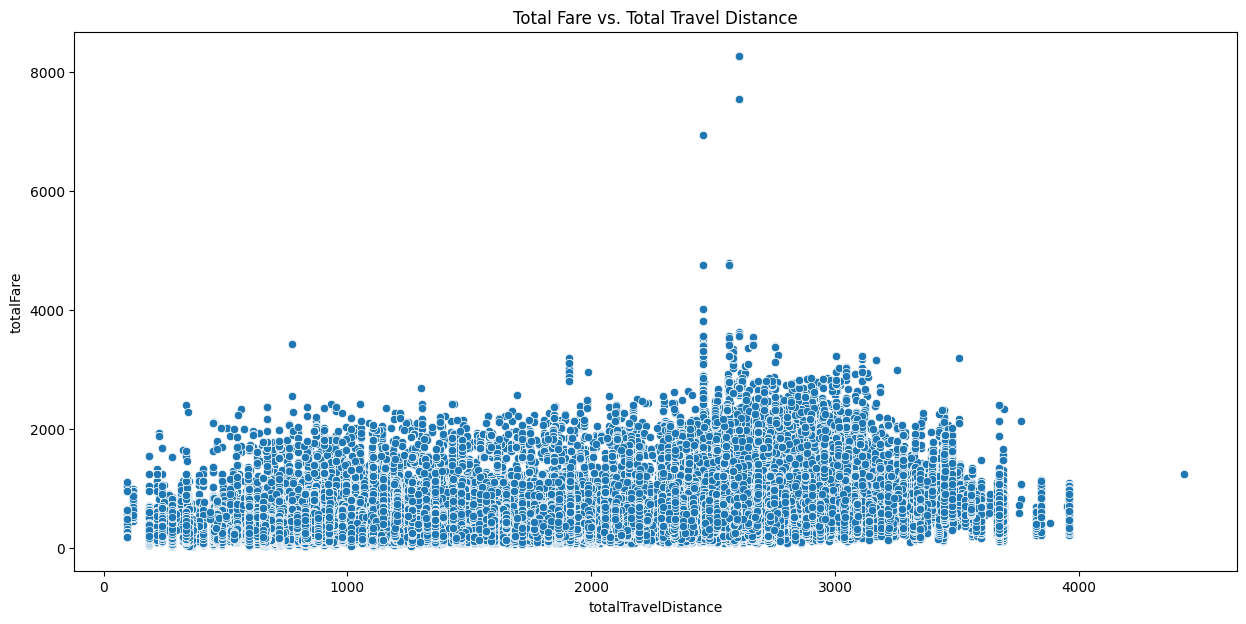

In [43]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=cleaned, x='totalTravelDistance', y='totalFare')
plt.title('Total Fare vs. Total Travel Distance')
plt.show()

#### **[3.3.6]** Feature Correlation Heatmap

/var/folders/d3/1ccm0vf97px00b_r657gv_dc0000gn/T/ipykernel_8087/1501566331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_preprocessed.corr()


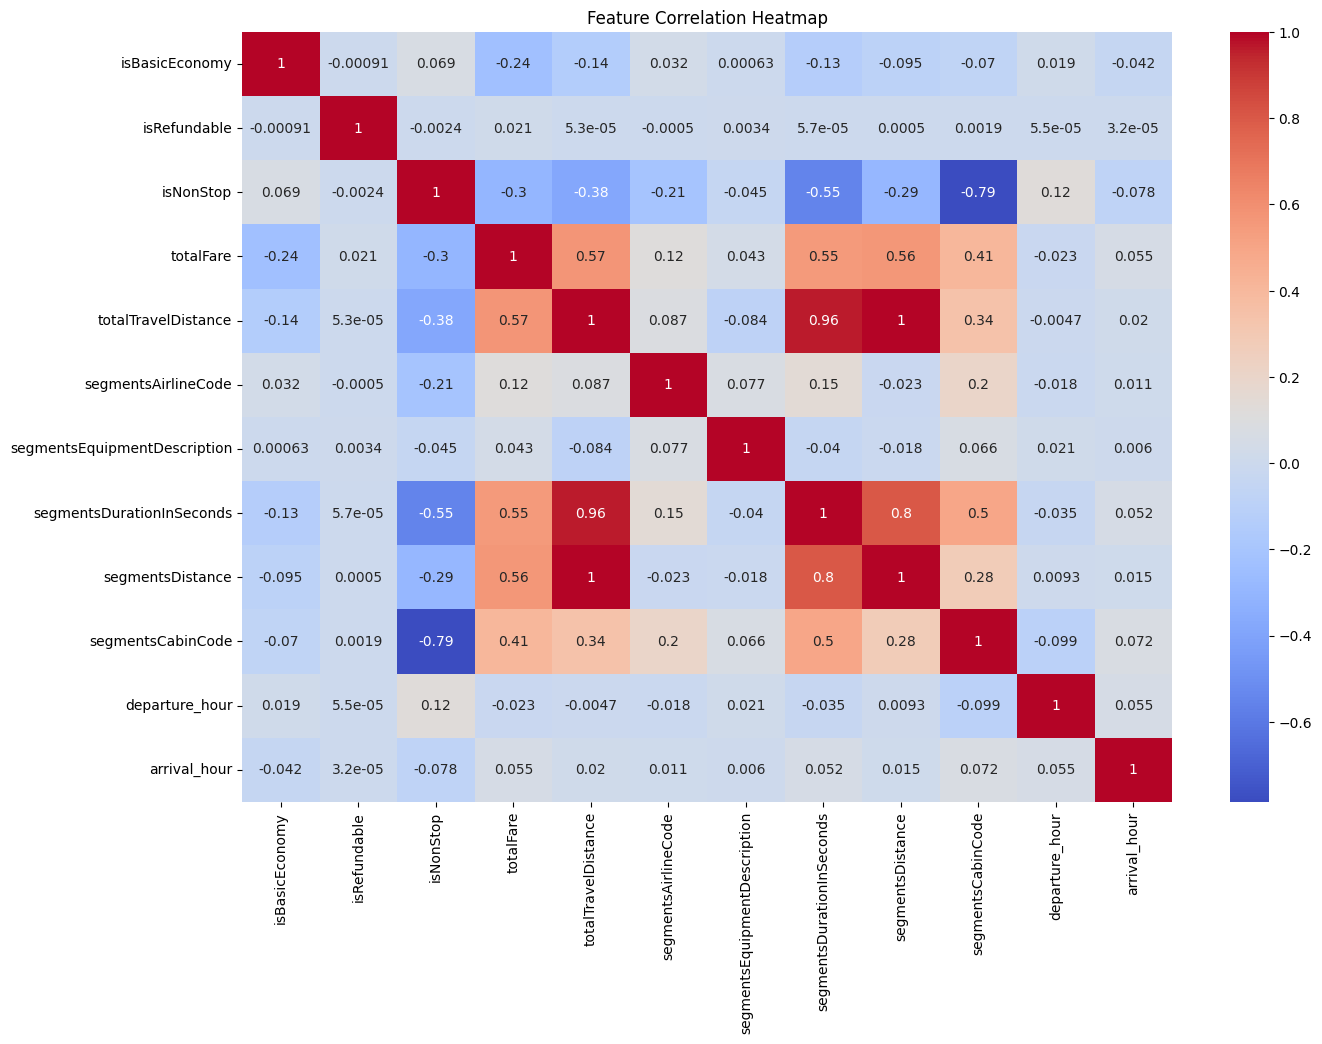

In [24]:
correlation = df_cleaned.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Data Preparation

In [11]:
df_cleaned = df_cleaned.set_index(['legId'])

### **[4.1]**  Define X and Y

In [12]:
X = df_cleaned.drop('totalFare', axis=1)
y = df_cleaned['totalFare']

### **[4.2]**  Define processing pipeline

In [13]:
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Define columns for numerical processing and categorical processing
numerical_features = X.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Numerical preprocessing: fill missing values, then standardize
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine the above preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the LightGBM model
model = lgb.LGBMRegressor()

# Create and evaluate the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

### **[4.3]**  Split dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Immediately delete dataframes that are no longer needed
del df
del df_cleaned
del X
del y
gc.collect()

40

### **[4.4]**  Define hyperparameters and train model

In [16]:
# Define hyperparameters for random search
param_dist = {
    'model__learning_rate': [0.005, 0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 500],
    'model__num_leaves': [20, 31, 40],
    'model__boosting_type': ['gbdt'],
    'model__objective': ['regression'],
    'model__metric': ['l2'],
    'model__subsample': [0.1],  # Reduced fraction of data to be used for each iteration
}

# Use RandomizedSearchCV with the pipeline
search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')

search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


python(47026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47445) Malloc

Best parameter (CV score=-12515.132):
{'model__subsample': 0.005, 'model__objective': 'regression', 'model__num_leaves': 31, 'model__n_estimators': 100, 'model__metric': 'l2', 'model__learning_rate': 0.1, 'model__boosting_type': 'gbdt'}


### **[4.5]**  save the pipeline

In [ ]:
import joblib

# Save the model
joblib.dump(search.best_estimator_, '/models/lightgbm_pipeline.pkl')

## 5. Evaluation

In [9]:
cd /Users/frodo/Downloads/36120/Project/adv_mla/ass3/

/Users/frodo/Downloads/36120/Project/adv_mla/ass3


**[5.1]** Load pipeline

In [6]:
import joblib

# load the model
lightgbm_pipeline = joblib.load('models/lightgbm_pipeline.pkl')

**[5.2]** prediction

In [16]:
# Predict on the test set
y_pred = lightgbm_pipeline.predict(X_test)

**[5.3]** Model Evaluation

In [17]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) on the test set: ", test_rmse)

Root Mean Squared Error (RMSE) on the test set:  99.25420617309507


## 6. Push changes

**[6.1]** Add the changes to git staging area

In [ ]:
git add .

**[6.2]** Create the snapshot of the repository and add a description

In [ ]:
git commit -m "first experiment"

**[6.3]** Push snapshot to Github

In [ ]:
git push --set-upstream origin first_experiment

## Reference

So, A. (2023). 36114_AdvDSI_Lab2_Exercise3_Solutions. https://drive.google.com/file/d/17UpMxkj4slAQ2BDyAeNEYzUfTA9Ww3x6/view